# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**ZF6 TEAM PREDICT**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import svm

from sklearn import metrics
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for file manipulation
import os

# Libraries to save the created model
import pickle

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
test_df = pd.read_csv('df_test.csv', index_col=0)
test_df.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [3]:
train_df = pd.read_csv('df_train.csv', index_col=0)
train_df.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


LOOK AT THE DATA STATISTICS

We examine the number of rows and columns in the train dataset

The Training data has a total of 8763 rows and 48 columns

47 predictor variables
1 outcome variable "load_shortfall_3h"

In [4]:
train_df.shape
# (8763, 48)

(8763, 48)

It would help to know the datatype of values stored in each column

In [5]:
train_df.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia

It was also observed that there are three non numeric columns in the dataset
- time
- Valencia_wind_deg
- Seville_pressure

The feature engineering section will touch on how these columns can be handled

We examine important statistics about the dataset to help us decide whether to remove entire columns or fill them up with likely values.

In [6]:
# produce a sorted list of the dataframe columns

# This ensures that all the relevant information about a city can be seen at a glance
sorted_df_columns = train_df.columns.sort_values()

# show the summary statitics of the training data and round the values to 2 decimal places
# the resulting dataframe is transposed to give so that all column values can be seen at a glance
train_df[sorted_df_columns].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Barcelona_pressure,8763.0,1377.96,14073.14,670.67,1014.00,1018.00,1022.00,1001411.00
Barcelona_rain_1h,8763.0,0.13,0.63,0.00,0.00,0.00,0.00,12.00
Barcelona_rain_3h,8763.0,0.00,0.00,0.00,0.00,0.00,0.00,0.09
Barcelona_temp,8763.0,289.86,6.53,270.82,284.97,289.42,294.91,307.32
Barcelona_temp_max,8763.0,291.16,7.27,272.15,285.48,290.15,296.86,314.08
Barcelona_temp_min,8763.0,288.45,6.10,269.48,284.15,288.15,292.97,304.82
Barcelona_weather_id,8763.0,765.98,88.14,200.67,800.00,800.33,801.00,804.00
Barcelona_wind_deg,8763.0,190.54,89.08,0.00,118.17,200.00,260.00,360.00
Barcelona_wind_speed,8763.0,2.87,1.79,0.00,1.67,2.67,4.00,12.67
Bilbao_clouds_all,8763.0,43.47,32.55,0.00,10.00,45.00,75.00,100.00


There is evidence of serious skew in the data of some of the columns They include the rain and snow columns for all the cities

A few of these are;

- `Barcelona_rain_1h`
- `Barcelona_rain_3h`
- `Bilbao_rain_1h`
- `Bilbao_snow_3h`
- `Madrid_rain_1h`

More than 75% of the values in these columns are 0

Next, we check the number of missing values in each column.

The valencia pressure column has a total of 2068 null values.

In [7]:
train_df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

We next investigate what percentage of the data is missing, this will help us decide weather to drop the column or replace the missing values in it.

In [8]:
missing_percent = train_df['Valencia_pressure'].isnull().sum() * 100 / len(train_df)
print("missing percentage: " + str(round(missing_percent, 2)))

missing percentage: 23.6


With `23.6%` of the values missing we will replace the missing values with the average `Valencia_pressure` readings for the month the missing value occurs 

Next we observe how many unique rows we have in our data set. We would expect time to have 100% unique.

We will take a look further on how we decide to handle columns with very little variation 

In [9]:
missing_percent = train_df.nunique()* 100 / len(train_df)
missing_percent

time                    100.000000
Madrid_wind_speed         0.433641
Valencia_wind_deg         0.114116
Bilbao_rain_1h            0.228232
Valencia_wind_speed       0.661874
Seville_humidity          3.126783
Madrid_humidity           3.195253
Bilbao_clouds_all         3.161018
Bilbao_wind_speed         0.445053
Seville_clouds_all        2.807258
Bilbao_wind_deg          11.890905
Barcelona_wind_speed      0.445053
Barcelona_wind_deg       11.114915
Madrid_clouds_all         2.852904
Seville_wind_speed        0.433641
Barcelona_rain_1h         0.353760
Seville_pressure          0.285290
Seville_rain_1h           0.193997
Bilbao_snow_3h            0.947164
Barcelona_pressure        2.156796
Seville_rain_3h           0.570581
Madrid_rain_1h            0.216821
Barcelona_rain_3h         0.878695
Valencia_snow_3h          0.068470
Madrid_weather_id         3.297957
Barcelona_weather_id      3.069725
Bilbao_pressure           2.339381
Seville_weather_id        3.434897
Valencia_pressure   

In [10]:
# plot relevant feature interactions

There are about 47 predictor columns in the dataset. plotting the relationship between all of them and the output might prove too verbose. Instead predictor columns which show considerable correlation with the load_shortfall are computed and plots are made for only those

In [11]:
def get_columns_by_corr(df, threshold):
    '''
    calculates the correlation between each predictor column and the output-'load_shortfall_3h'
    The threshold parameter is used to determine the appropriate column to plot
    '''
    correlation_map = df.corr()
    corrmap = correlation_map[['load_shortfall_3h']]
    
    # filter for both high positive correlation and high negative correlation hence the '> threshold` and '< -threshold'
    corrmap = corrmap[(corrmap['load_shortfall_3h'] > threshold)|(corrmap['load_shortfall_3h'] < -threshold)]
    
    return corrmap.drop('load_shortfall_3h').T.columns

In [12]:
corr_columns = get_columns_by_corr(train_df, 0.12)

In [13]:
for col in corr_columns:
    train_df.plot.scatter(x='load_shortfall_3h', y=col)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

What is immediately obvious is that the predictor columns have very little linear correlation with the output. And this suggests that a linear machine learning model would not perform well as the plots shows very high levels of non-linearity

In [14]:
# evaluate correlation

We attempt to evaluate the correlation of data values using a heatmap

<IPython.core.display.Javascript object>


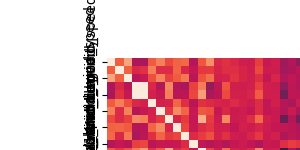

<AxesSubplot:>

In [15]:
corrmat = train_df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=.8, square=True)

A strong positive correlation is observed between the temperature readings across all the different cities

This makes sense as it is reasonable to expect different locations in one country to not have widly varying temperature readings. This though may make it difficult to build an acurate model so a fix for it might be to take the sum of all three temperature columns ('temp', 'temp_min', 'temp_max') to create a single predictor column per city.

A strong negative correlation is also present between temperature readings and humdity across all cites suggesting that the hotter the cites are the less humidity was measured. This too is a reasonable expectation

A strong negative correlation is also present between the weather_id readings and rainfall readings, as well as between weather_id readings and clouds_all readings

In [16]:
# have a look at feature distributions

To add further structure to the plots, we first create a dictionary with the city names as the key and a dataframe of associated columns as the value

In [17]:
# It might reveal some insight to examine the data on the basis of cities
def group_df_by_cites(df):
    df = df.copy()
    col_group = []
    used_col_names = []
    current_index = -1
    cities_dictionary = {}
    sorted_col_names = df.drop(['load_shortfall_3h', 'time'], axis=1).columns.sort_values()

    for col in sorted_col_names:
        col_split = col.split("_")[0]
        if col_split not in used_col_names:
            col_group.append(list())
            used_col_names.append(col_split)
            current_index = current_index + 1
        col_group[current_index].append(col)


    for group in col_group:
        group.sort()
        city_name = group[0].split("_")[0]
        cities_dictionary[city_name] = df[group]
        #cities_dictionary[city_name]['load_shortfall_3h'] = df['load_shortfall_3h']
        #cities_dictionary[city_name]['time'] = df['time']
        #cities_dictionary[city_name] = cities_dictionary[city_name].drop([city_name+'_temp_max', city_name+'_temp_min'], axis=1)
    return cities_dictionary

In [18]:
cities = group_df_by_cites(train_df)

In [19]:
cities["Barcelona"].hist(bins=30, figsize=(10,10))

<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Barcelona_pressure'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_3h'}>],
       [<AxesSubplot:title={'center':'Barcelona_temp'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_max'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_min'}>],
       [<AxesSubplot:title={'center':'Barcelona_weather_id'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>]],
      dtype=object)

In [20]:
cities["Bilbao"].hist(bins=30, figsize=(10,10))

<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_pressure'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>],
       [<AxesSubplot:title={'center':'Bilbao_snow_3h'}>,
        <AxesSubplot:title={'center':'Bilbao_temp'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_max'}>],
       [<AxesSubplot:title={'center':'Bilbao_temp_min'}>,
        <AxesSubplot:title={'center':'Bilbao_weather_id'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_deg'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [21]:
cities["Valencia"].hist(bins=30, figsize=(10,10))

<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Valencia_humidity'}>,
        <AxesSubplot:title={'center':'Valencia_pressure'}>,
        <AxesSubplot:title={'center':'Valencia_snow_3h'}>],
       [<AxesSubplot:title={'center':'Valencia_temp'}>,
        <AxesSubplot:title={'center':'Valencia_temp_max'}>,
        <AxesSubplot:title={'center':'Valencia_temp_min'}>],
       [<AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [22]:
cities["Seville"].hist(bins=30, figsize=(10,10))

<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Seville_clouds_all'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Seville_rain_1h'}>],
       [<AxesSubplot:title={'center':'Seville_rain_3h'}>,
        <AxesSubplot:title={'center':'Seville_temp'}>,
        <AxesSubplot:title={'center':'Seville_temp_max'}>],
       [<AxesSubplot:title={'center':'Seville_temp_min'}>,
        <AxesSubplot:title={'center':'Seville_weather_id'}>,
        <AxesSubplot:title={'center':'Seville_wind_speed'}>]],
      dtype=object)

In [23]:
cities["Madrid"].hist(bins=30, figsize=(10,10))

<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Madrid_clouds_all'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_pressure'}>],
       [<AxesSubplot:title={'center':'Madrid_rain_1h'}>,
        <AxesSubplot:title={'center':'Madrid_temp'}>,
        <AxesSubplot:title={'center':'Madrid_temp_max'}>],
       [<AxesSubplot:title={'center':'Madrid_temp_min'}>,
        <AxesSubplot:title={'center':'Madrid_weather_id'}>,
        <AxesSubplot:title={'center':'Madrid_wind_speed'}>]], dtype=object)

The high skew hinted of the rain and snow readings hinted earlier by the summary statics can be clearly seen in the histograms.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [24]:
# remove missing values/ features

We begin feature engineering here. And since the process of model improvement is largely iterative we have found it very helpful to repeat the logic for loading the CSV file here. This is because we often need to make some changes to the feature engineering section and as such require fresh data to work with

In [25]:
train_df = pd.read_csv('df_train.csv', index_col=0)
train_df.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


We now add a function that helps us calculate the amount of variance in each column. We may decide to drop columns with too little variance if it will improve the model performance

In [26]:
def drop_too_little_variance(df, threshold):
    col_name = df.columns
    count = df["time"].count()
    drop_columns = []
    for col in col_name:
        unique_percent = int(df[col].nunique()/count * 100 )
        if unique_percent < threshold:
            drop_columns.append(col)
        
    return drop_columns
col_with_little_variance = drop_too_little_variance(train_df, 1)

In [27]:
col_with_little_variance
# the following columns did not surpass the variance threshold

['Madrid_wind_speed',
 'Valencia_wind_deg',
 'Bilbao_rain_1h',
 'Valencia_wind_speed',
 'Bilbao_wind_speed',
 'Barcelona_wind_speed',
 'Seville_wind_speed',
 'Barcelona_rain_1h',
 'Seville_pressure',
 'Seville_rain_1h',
 'Bilbao_snow_3h',
 'Seville_rain_3h',
 'Madrid_rain_1h',
 'Barcelona_rain_3h',
 'Valencia_snow_3h']

It would prove very helpful to break up the time column into Year, month, day, and time columns.

This would make it possible for the model to learn the weather patterns that corresponds to the various times of the year and improve the model performance.

In [28]:
def split_time(df):
    years = []
    months = []
    days = []
    hours = []
    
    df = df.copy()
    def split(composite_time):
        year_month_day, time = composite_time.split(" ")
        year, month, day = year_month_day.split("-")
        hour = time.split(":")[0]

        years.append(float(year))
        months.append(float(month))
        days.append(float(day))
        hours.append(float(hour))
        return
    
    df['time'].apply(split)
    
    df['years'] = years
    df['months'] = months
    df['days'] = days
    df['hours'] = hours
    
    return df

In [29]:
train_df = split_time(train_df)
train_df.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,years,months,days,hours
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015.0,1.0,1.0,3.0
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015.0,1.0,1.0,6.0


Since our dataset now have columns for year, and month. 
A good approach to take when replacing the missing values in the valencia_pressure columns is to replace with the average reading for the month in which the reading was made

- The mean values of the `Valencia_pressure` is aggregated by Year and month
- Missing values are then replaced with the mean of the corresponding month

In [30]:
def replace_valencia_pressure(df):
    sub_df = df[['years', 'months', 'Valencia_pressure']]
    aggregate = sub_df.groupby(['years', 'months']).mean()
    
    for index, column in df[['Valencia_pressure']].iterrows():
        if pd.isnull(df.loc[index, 'Valencia_pressure']):
            year = df.loc[index, 'years']
            month = df.loc[index, 'months']
            df.loc[index, 'Valencia_pressure'] = aggregate.loc[year].loc[month, 'Valencia_pressure']
            
    return df

train_df = replace_valencia_pressure(train_df)

In [31]:
# create new features

There are several ways to handle categorical variables;

- The `handle_categorical_column` function creates dummy variables for each column. 
- The `handle_categorical_column_v2` function simply subsets the string values to portions that can be parsed as into numeric values

We have both so that we can safely avoid the problem of a data set with too many dimensions and not enough data to train the model

In [32]:
def handle_categorical_column(input_df, column_name):
    return pd.get_dummies(input_df, columns=[column_name], drop_first=True)

In [33]:
def handle_categorical_column_v2(input_df):
    input_df = input_df.copy()
    #input_df["Valencia_wind_deg"] = input_df["Valencia_wind_deg"].apply(lambda level: float(level.split("_")[1]))
    input_df["Seville_pressure"] = input_df["Seville_pressure"].apply(lambda level: float(level[2:]))
    return input_df

In [34]:
train_df = handle_categorical_column(train_df, "Valencia_wind_deg")
#train_df = handle_categorical_column(train_df, "Seville_pressure")
train_df = handle_categorical_column_v2(train_df)

In [35]:
# engineer existing features

The multicolinearity observed between the temperature readings across the various cities as shown in the heat map plotted above can be reduced by simply summing the the average, max, and min temperature reading per city

In [36]:
# handle colinear temperature columns

def handle_colinear_temp_cols(df):
    df['Valencia_temp_min_max'] = df['Valencia_temp'] + df['Valencia_temp_min'] + df['Valencia_temp_max']
    df['Seville_temp_min_max'] = df['Seville_temp'] + df['Seville_temp_min'] + df['Seville_temp_max']
    df['Madrid_temp_min_max'] = df['Madrid_temp'] + df['Madrid_temp_min'] + df['Madrid_temp_max']
    df['Bilbao_temp_min_max'] = df['Bilbao_temp'] + df['Bilbao_temp_min'] + df['Bilbao_temp_max']
    df['Barcelona_temp_min_max'] = df['Barcelona_temp'] + df['Barcelona_temp_min'] + df['Barcelona_temp_max']
    return df

train_df = handle_colinear_temp_cols(train_df)

A seperate function for droping columns is created. This makes it easy to rapidly make changes to the training data when improving model perfomance

In [37]:
# drop any unneccesary column
def drop_columns(df):   
    # columns to drop because of colinearity
    colinear_columns = [
        'Valencia_temp_max',
        'Valencia_temp_min',
        'Valencia_temp',
        'Seville_temp_max',
        'Seville_temp_min',
        'Seville_temp',
        'Madrid_temp_max', 
        'Madrid_temp_min',
        'Madrid_temp',
        'Bilbao_temp_max',
        'Bilbao_temp_min',
        'Bilbao_temp',
        'Barcelona_temp_max',
        'Barcelona_temp_min',
        'Barcelona_temp'
    ]
    
    
    
    drop_total = colinear_columns# + col_with_little_variance
    df = df.drop(drop_total, axis=1)
    return df

train_df = drop_columns(train_df)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

split data

We create dataframes for predictors as well as the output - `load_shortfall`

In [38]:
X = train_df.drop(['load_shortfall_3h'], axis=1)

y = train_df['load_shortfall_3h']

The training data is split into a training set (80%) and a validation set (20%)

In [39]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

create targets and features dataset

In [40]:
# Save the time column for use later
X_test_time = X_validation[['time']]

# remove the time column from the split
X_train = X_train.drop(['time'], axis=1)
X_validation = X_validation.drop(['time'], axis=1)

## Standardize the dataset

We standardized and re-scaled the data to reduce the effect of outliers on our model

In [41]:
# Standardize the model to place all columns in the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.fit_transform(X_validation)

In [42]:
X_train = pd.DataFrame(X_train)
X_validation = pd.DataFrame(X_validation)

In [43]:
# create one or more ML models

We created several linear regression models 

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [46]:
lasso = Lasso(alpha=0.4)
lasso.fit(X_train, y_train)

Lasso(alpha=0.4)

We created several non-linear models

In [47]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=5,random_state=42)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [48]:
RF = RandomForestRegressor(n_estimators=200, max_depth=8)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=200)

In [49]:
svr_poly = svm.SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.2, coef0=3)
svr_poly.fit(X_train, y_train)

SVR(C=100, coef0=3, epsilon=0.2, gamma='auto', kernel='poly')

In [50]:
# evaluate one or more ML models

# Model ensembling

Ensemble methods - Heterogenous methods

In [51]:
models = [("LM", lasso), ("RF",RF), ("SVR",svr_poly)]

In [52]:
# voting regressor

model_weightings = np.array([0.2, 0.5, 0.3])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)
v_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('LM', Lasso(alpha=0.4)),
                            ('RF',
                             RandomForestRegressor(max_depth=8,
                                                   n_estimators=200)),
                            ('SVR',
                             SVR(C=100, coef0=3, epsilon=0.2, gamma='auto',
                                 kernel='poly'))],
                weights=array([0.2, 0.5, 0.3]))

In [ ]:
# stacking regressor

meta_learner_reg = LinearRegression()
s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)
s_reg.fit(X_train, y_train)

Ensemble methods - Homogenous methods

In [ ]:
# Bagging with decision tree as the base model

d_tree = DecisionTreeRegressor(max_depth=4)
bag_reg = BaggingRegressor(base_estimator = d_tree)
bag_reg.fit(X_train, y_train)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic